In [31]:
import numpy as np
import pandas as pd
import glob as glob 
import os
import pathlib
import matplotlib.pyplot as plt

import sys
sys.path.append('../radar_mesure')
from radar import RadarMesure

import re


def plot_dual_frequency(data13, data17, pit_id, title_prefix="Comparaison fréquences"):
    angles = [d.angle_local for d in data13] 
    pente = data13[0].pente

    # --- On récupère nom du site à partir de data13 ---
    site_name = data13[0].site

    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f"{site_name} — {title_prefix}", fontsize=18)

    gs = fig.add_gridspec(2, len(angles), height_ratios=[3, 1], hspace=0.5)

    sigma13 = []
    sigma17 = []

    for i, (f13, f17, angle) in enumerate(zip(data13, data17, angles)):

        df13 = f13.df.loc[0.5:5]
        df17 = f17.df.loc[0.5:5]

        sigma13.append(f13.sigma0)
        sigma17.append(f17.sigma0)

        # === Axe principal (13 GHz) — inchangé ===
        ax = fig.add_subplot(gs[0, i])
        ax.plot(df13["copol"], df13.index, color="blue", label="13 GHz")
        ax.set_xlim(0, df13["copol"].max() * 1.1)
        ax.set_ylim(5, 0)
        ax.set_xlabel("Amplitude 13 GHz (AU)", color="blue")
        ax.tick_params(axis='x', colors='blue')

        # === Axe secondaire (17 GHz) — inchangé ===
        ax2 = ax.twiny()
        ax2.plot(df17["copol"], df17.index, color="red", linestyle="-", label="17 GHz")
        ax2.set_xlim(0, df17["copol"].max() * 1.1)

        ax2.spines['bottom'].set_position(('outward', 40))
        ax2.xaxis.set_ticks_position('bottom')
        ax2.xaxis.set_label_position('bottom')
        ax2.set_xlabel("Amplitude 17 GHz (AU)", color="red")
        ax2.tick_params(axis='x', colors='red')

        ax.set_title(f"{angle - pente:.1f}°")

        if i == 0:
            ax.set_ylabel("Range (m)")
        else:
            ax.set_yticks([])

    # === Bas : sigma0 — inchangé ===
    ax_bottom = fig.add_subplot(gs[1, :])
    ax_bottom.plot([a - pente for a in angles], sigma13,
                   marker='o', color='blue', label="σ° 13 GHz")
    ax_bottom.plot([a - pente for a in angles], sigma17,
                   marker='o', color='red', linestyle='-', label="σ° 17 GHz")

    ax_bottom.set_xlabel("Angle (°)")
    ax_bottom.set_ylabel("σ° (dB)")
    ax_bottom.grid(True)
    ax_bottom.legend()

    # === Sauvegarde avec pit_id fourni en argument ===
    savepath = f"../results/multiangle_{pit_id}.png"
    plt.savefig(savepath, dpi=300, bbox_inches='tight')
    print(f"Figure enregistrée dans : {savepath}")

    plt.show()


def plot_special_horizontal(special_dict, title_prefix="Positions spéciales"):

    # Séparer fichiers 13 GHz et 17 GHz
    files_by_freq = {13: {}, 17: {}}

    for key, file_list in special_dict.items():
        for f in file_list:
            rm = RadarMesure(f)
            freq = rm.frequence
            if freq in (13, 17):
                files_by_freq[freq][key] = f

    # ---- Fonction interne pour tracer une figure par fréquence ----
    def plot_one_frequency(freq, files_dict):

        fig, axes = plt.subplots(1, 3, figsize=(6, 6), sharey=True)
        fig.suptitle(f"{title_prefix} — {freq} GHz", fontsize=16)

        order = ["left", "center", "right"]

        for ax, key in zip(axes, order):

            if key not in files_dict:
                ax.set_visible(False)
                continue

            rm = RadarMesure(files_dict[key])
            df = rm.df[0.5:5]
            sigma = rm.sigma0
            ax.plot(df["copol"], df.index, label=f'σ° = {sigma :.2f}(dB)')
            ax.invert_yaxis()
            ax.set_xlabel("Amplitude (AU)")
            if ax is axes[0]:
                ax.set_ylabel("Range (m)")
            ax.set_title(key.capitalize())
            ax.grid(True, linestyle="--", alpha=0.4)
            ax.legend(loc = 'upper left')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    # ---- Tracer pour 13 GHz ----
    if files_by_freq[13]:
        plot_one_frequency(13, files_by_freq[13])

    # ---- Tracer pour 17 GHz ----
    if files_by_freq[17]:
        plot_one_frequency(17, files_by_freq[17])



'F1'

Figure enregistrée dans : ../results/multiangle_F1.png


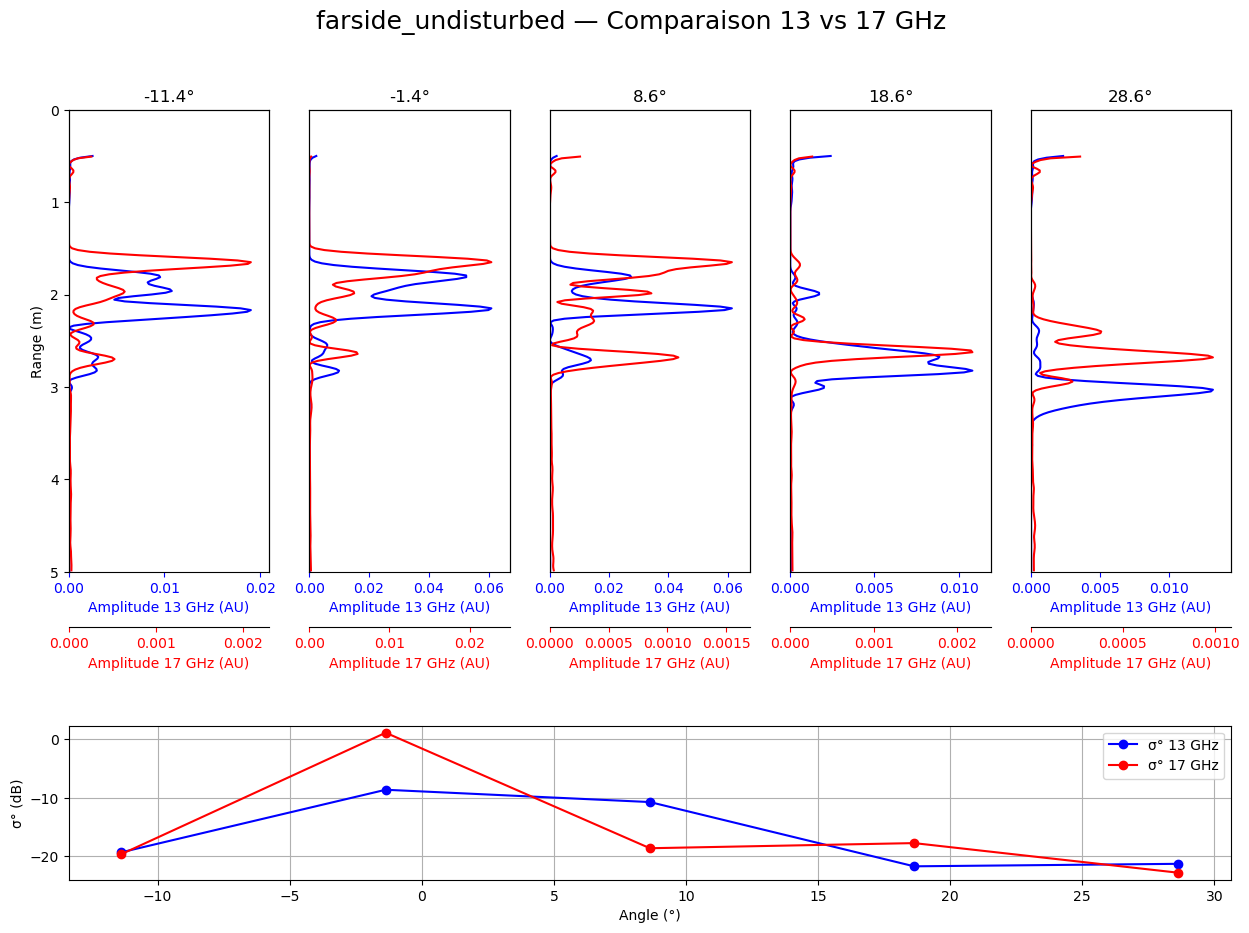

Figure enregistrée dans : ../results/multiangle_F2.png


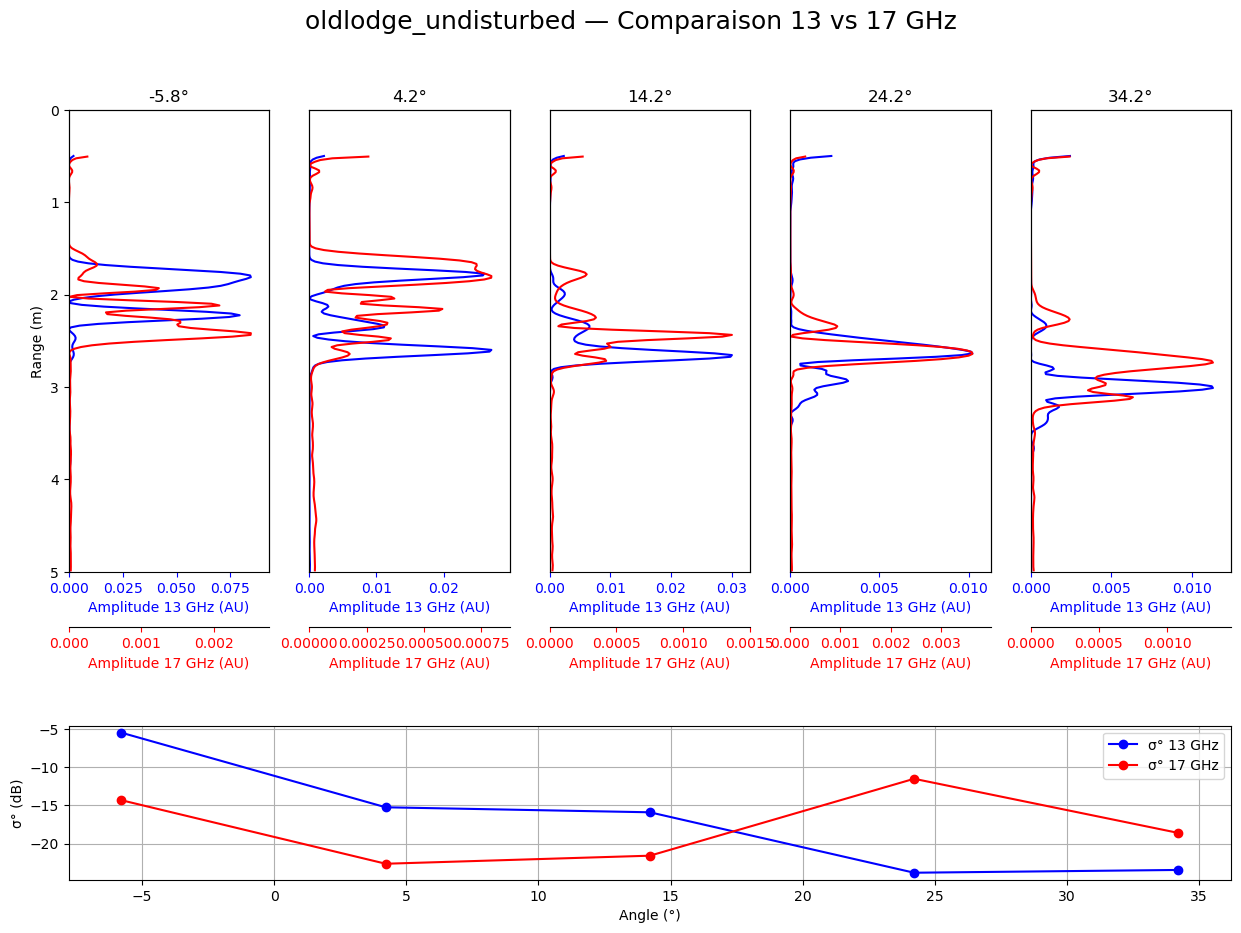

Figure enregistrée dans : ../results/multiangle_J5.png


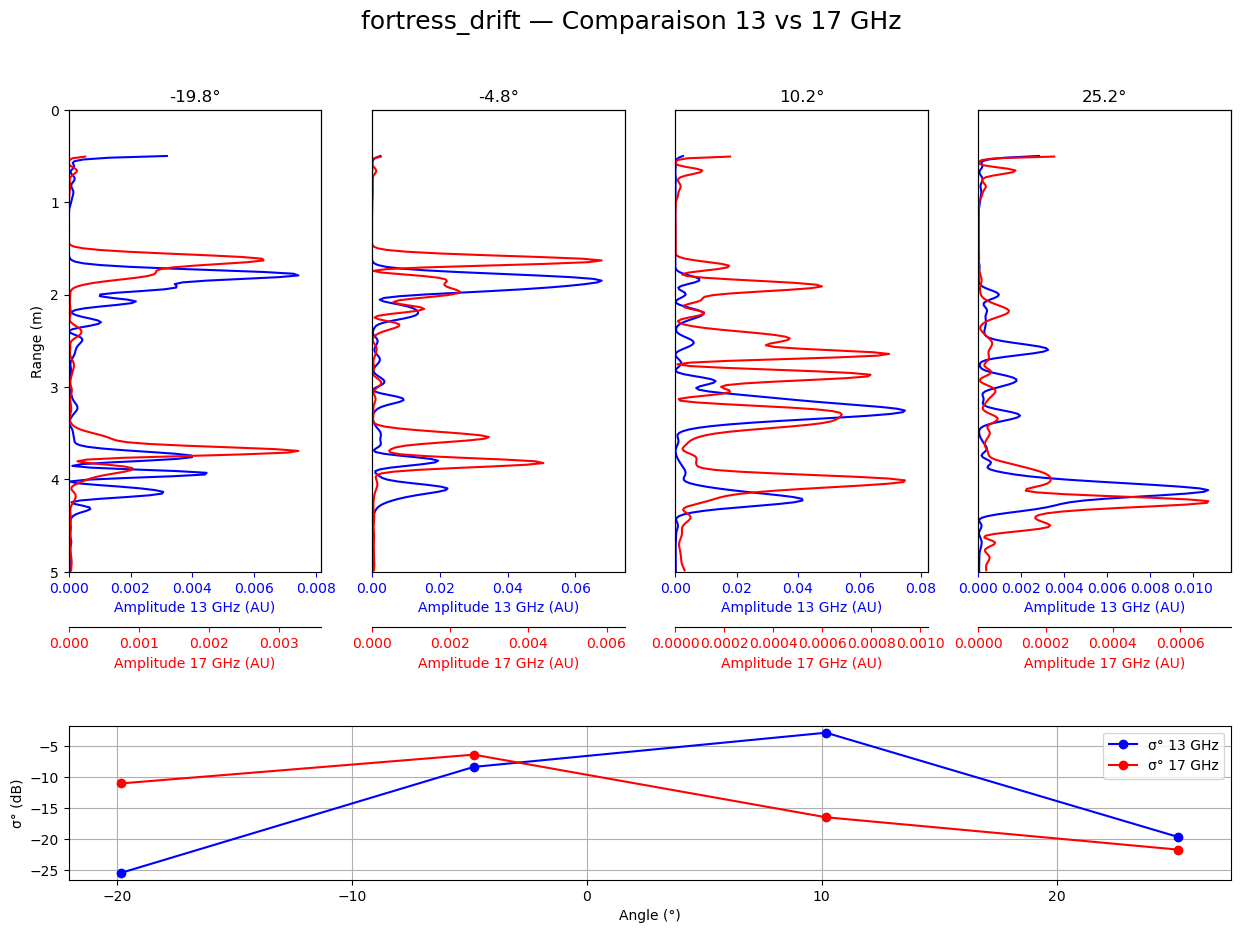

Figure enregistrée dans : ../results/multiangle_D5.png


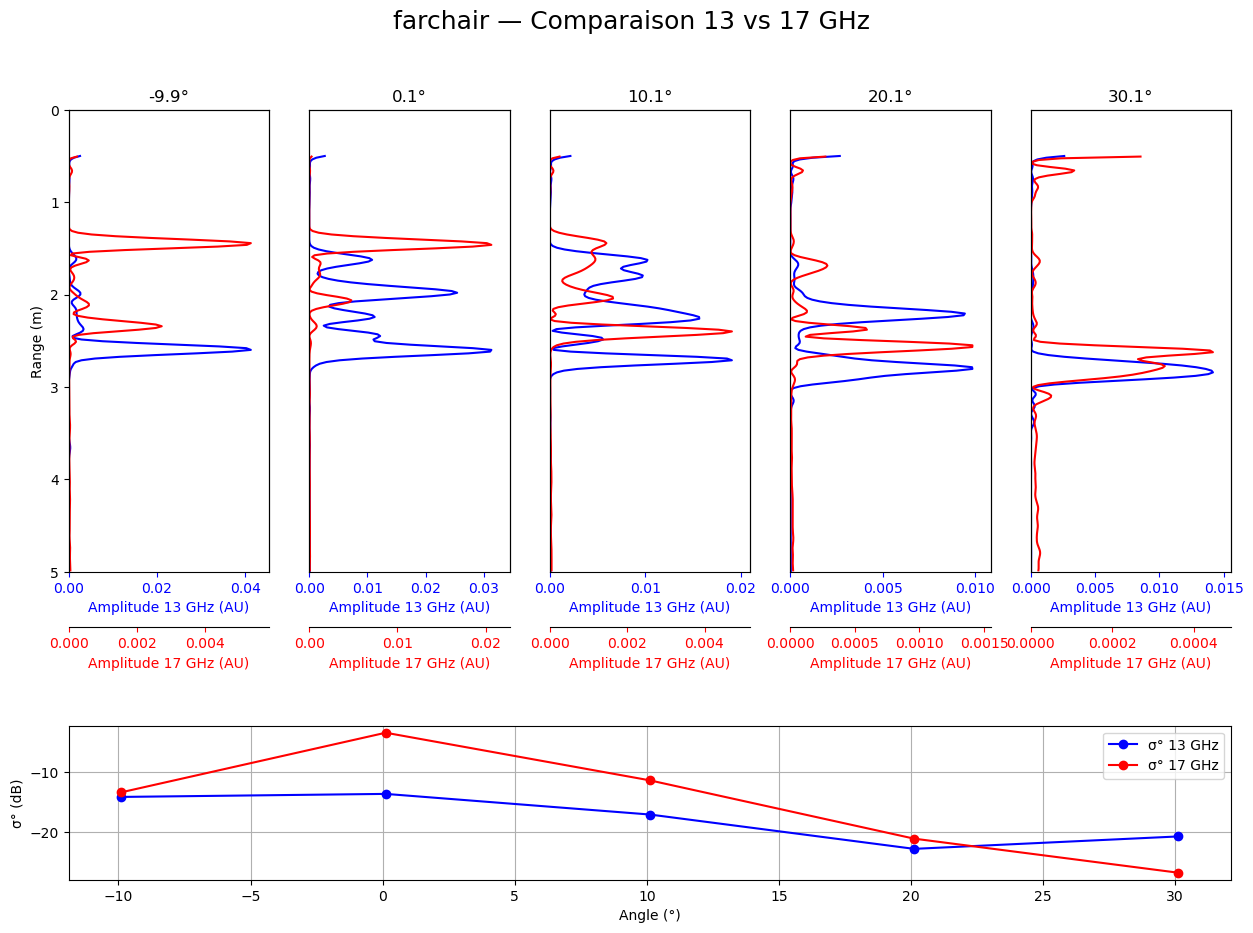

Figure enregistrée dans : ../results/multiangle_J3.png


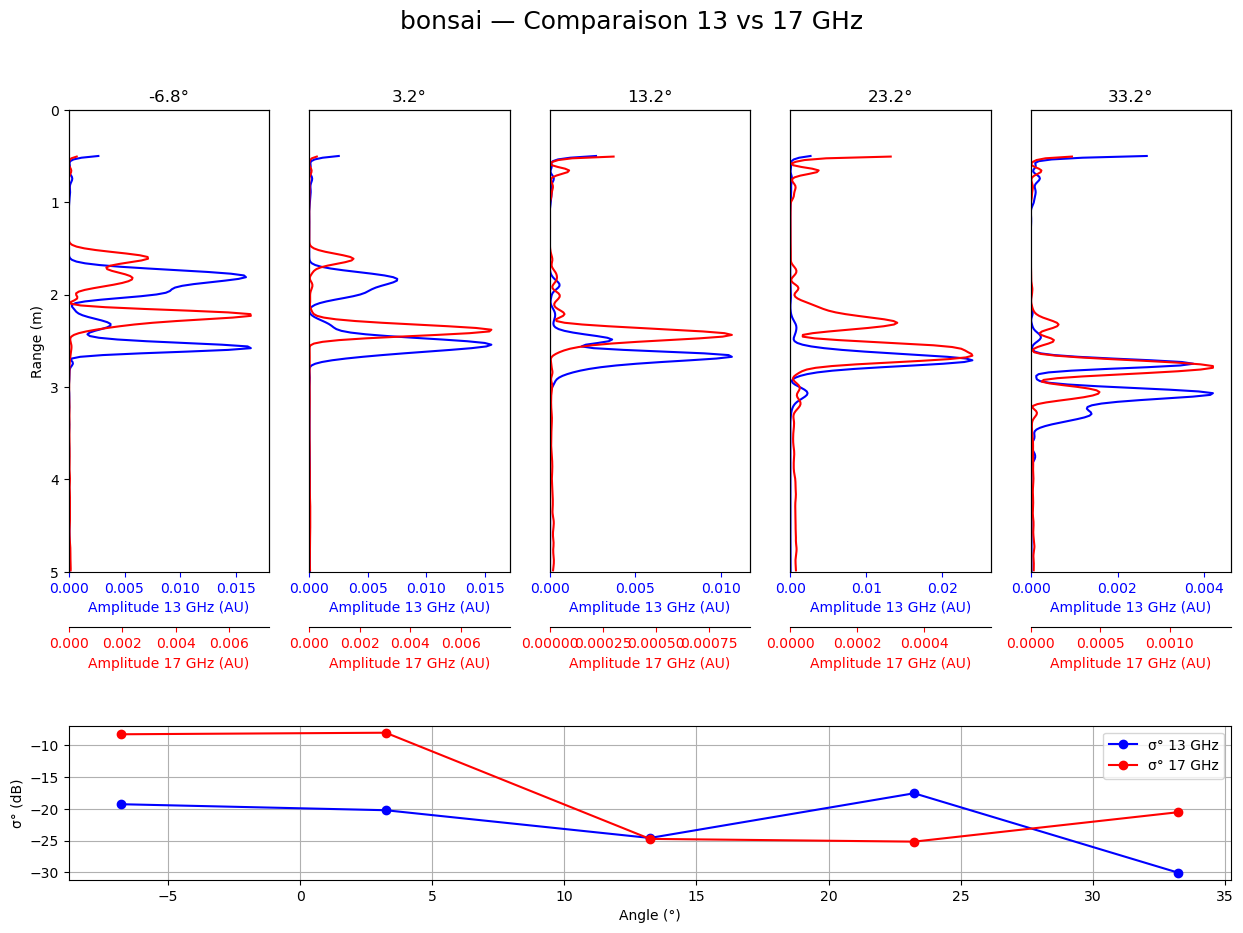

Figure enregistrée dans : ../results/multiangle_D3.png


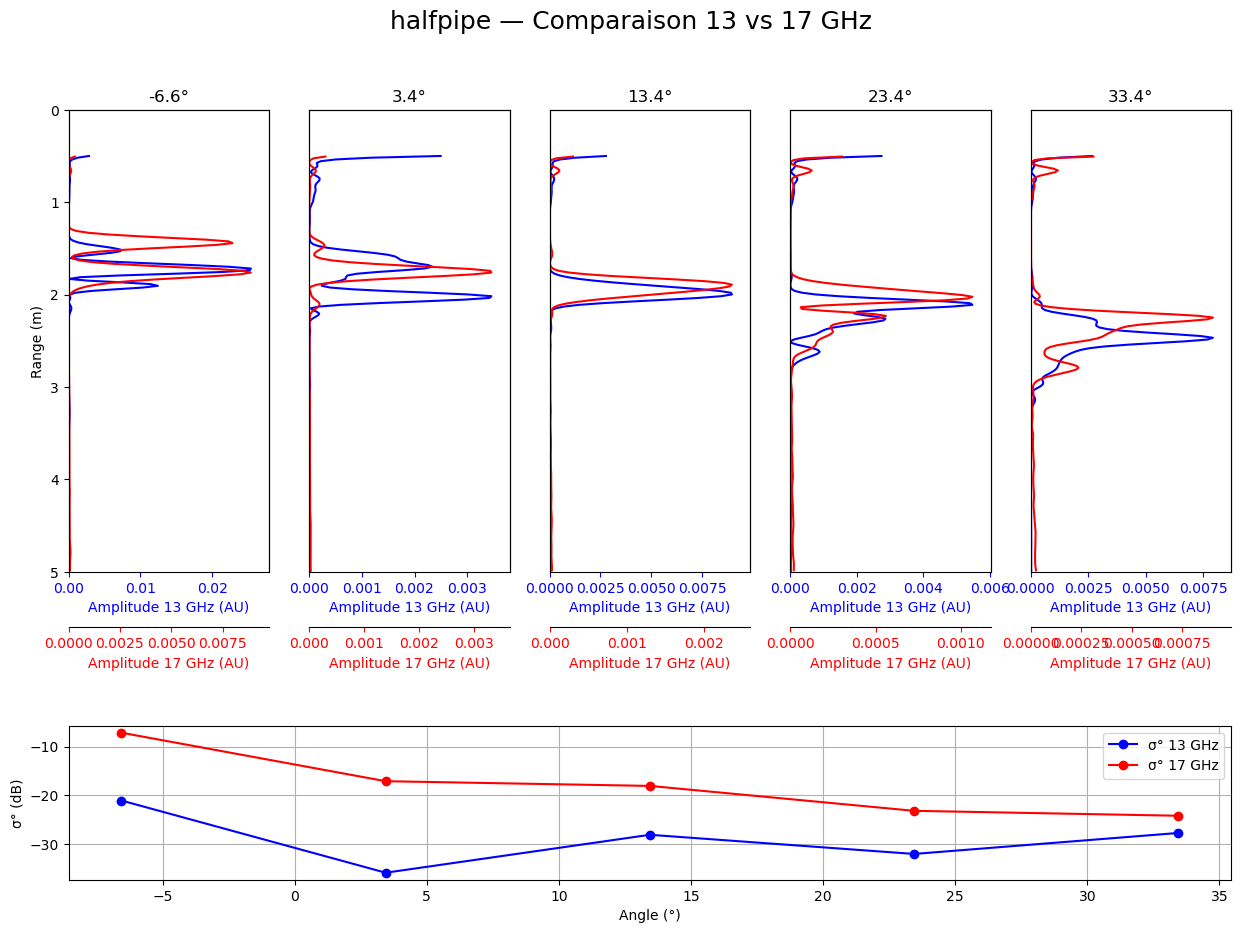

Figure enregistrée dans : ../results/multiangle_F8.png


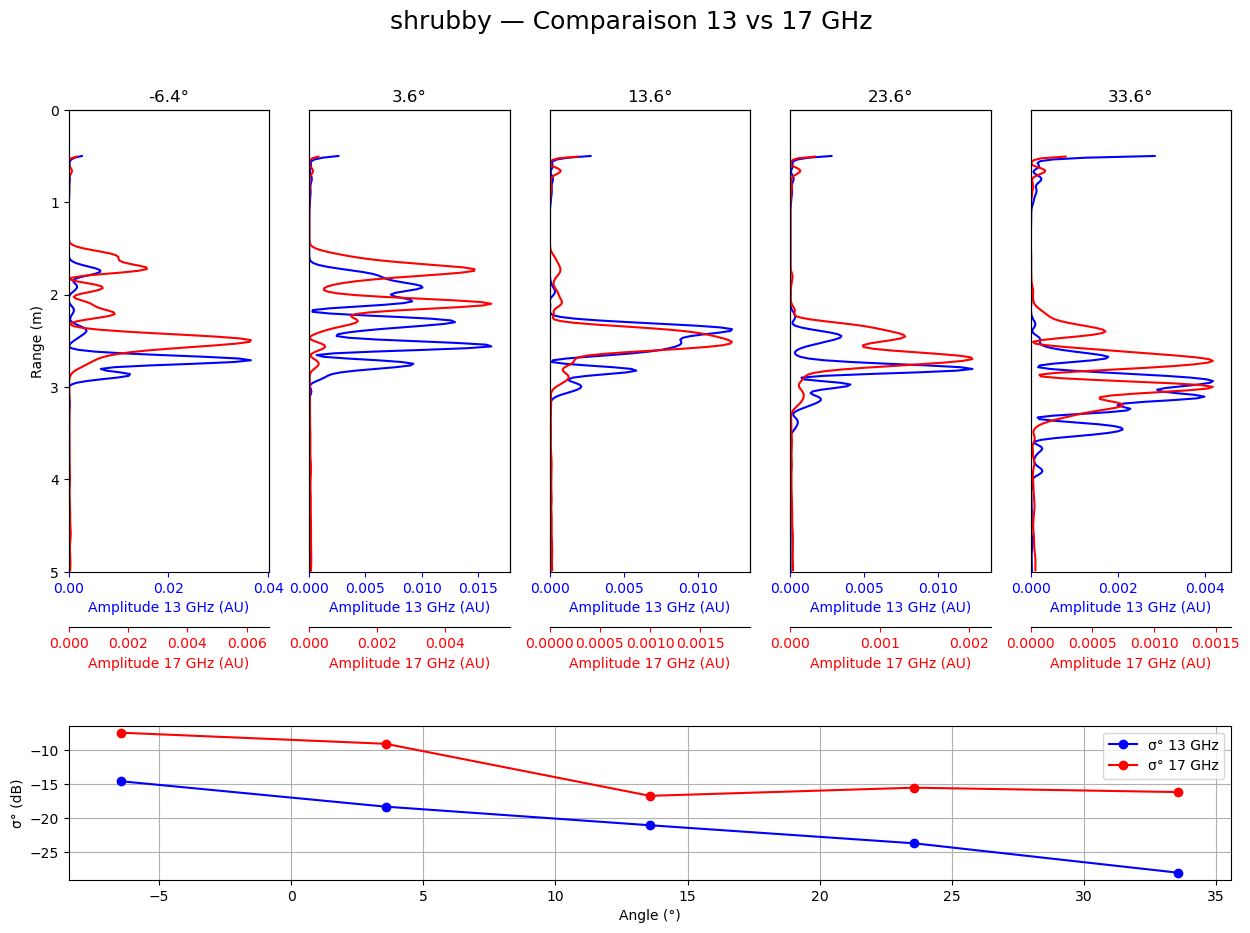

Figure enregistrée dans : ../results/multiangle_D9.png


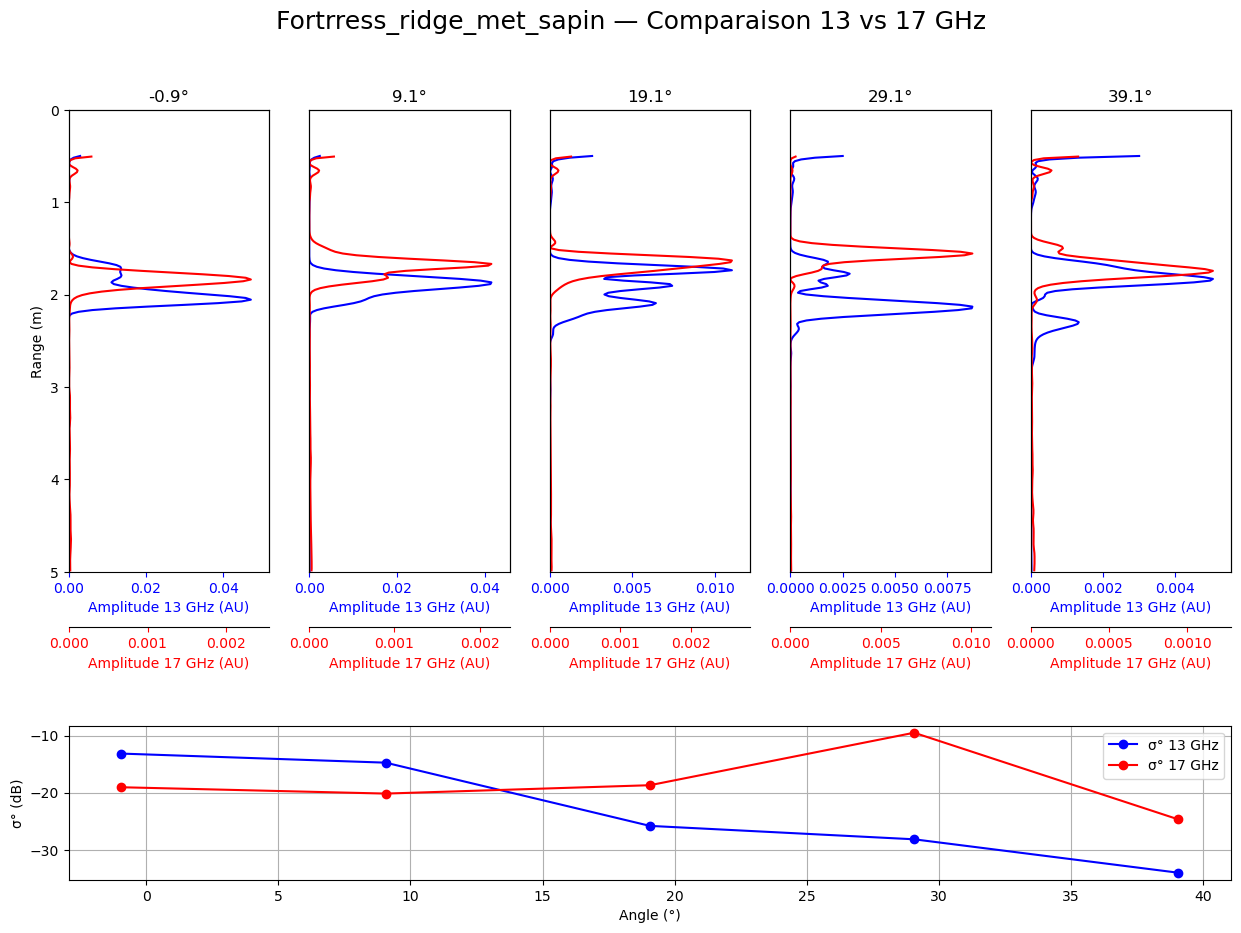

Figure enregistrée dans : ../results/multiangle_F9.png


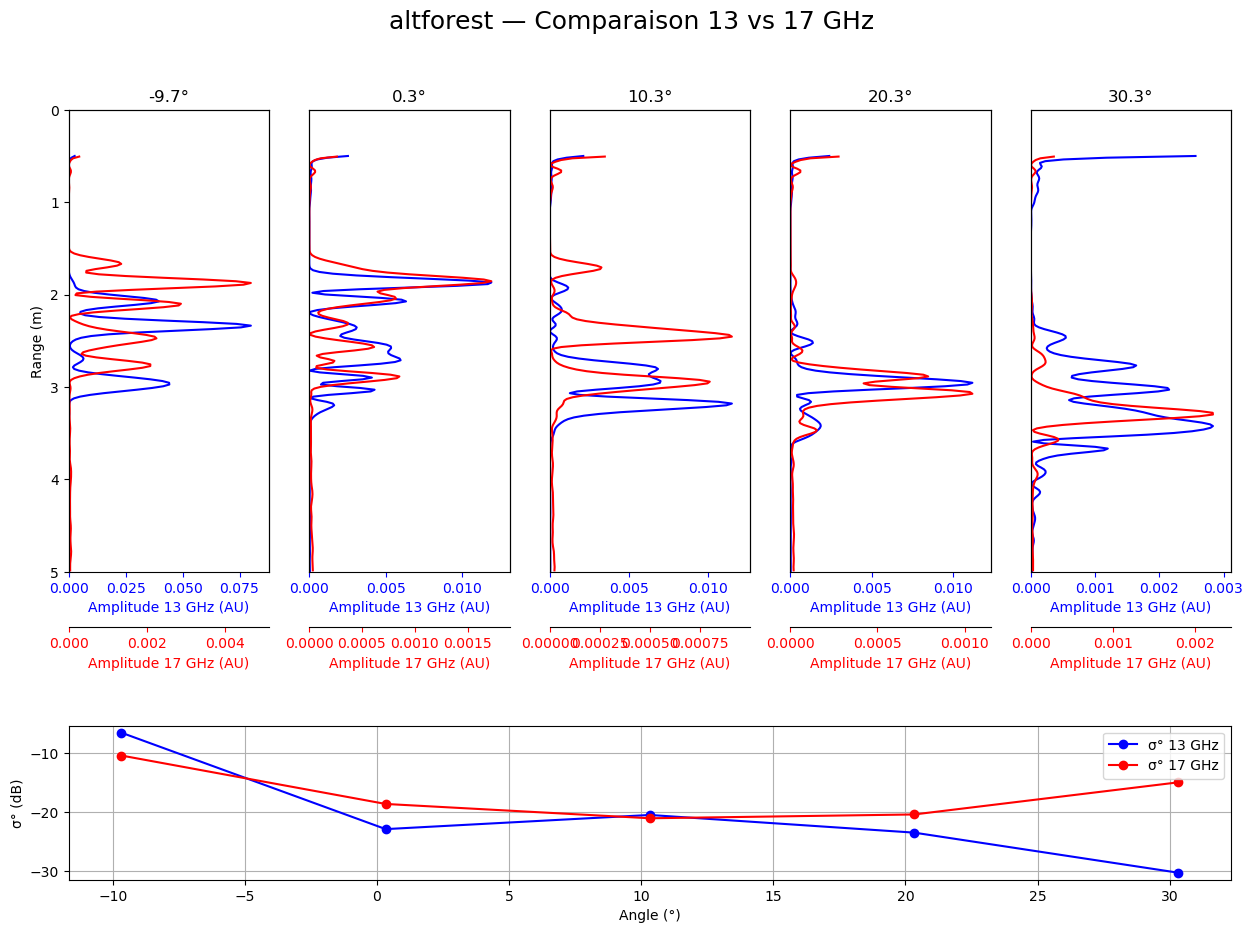

Figure enregistrée dans : ../results/multiangle_J6.png


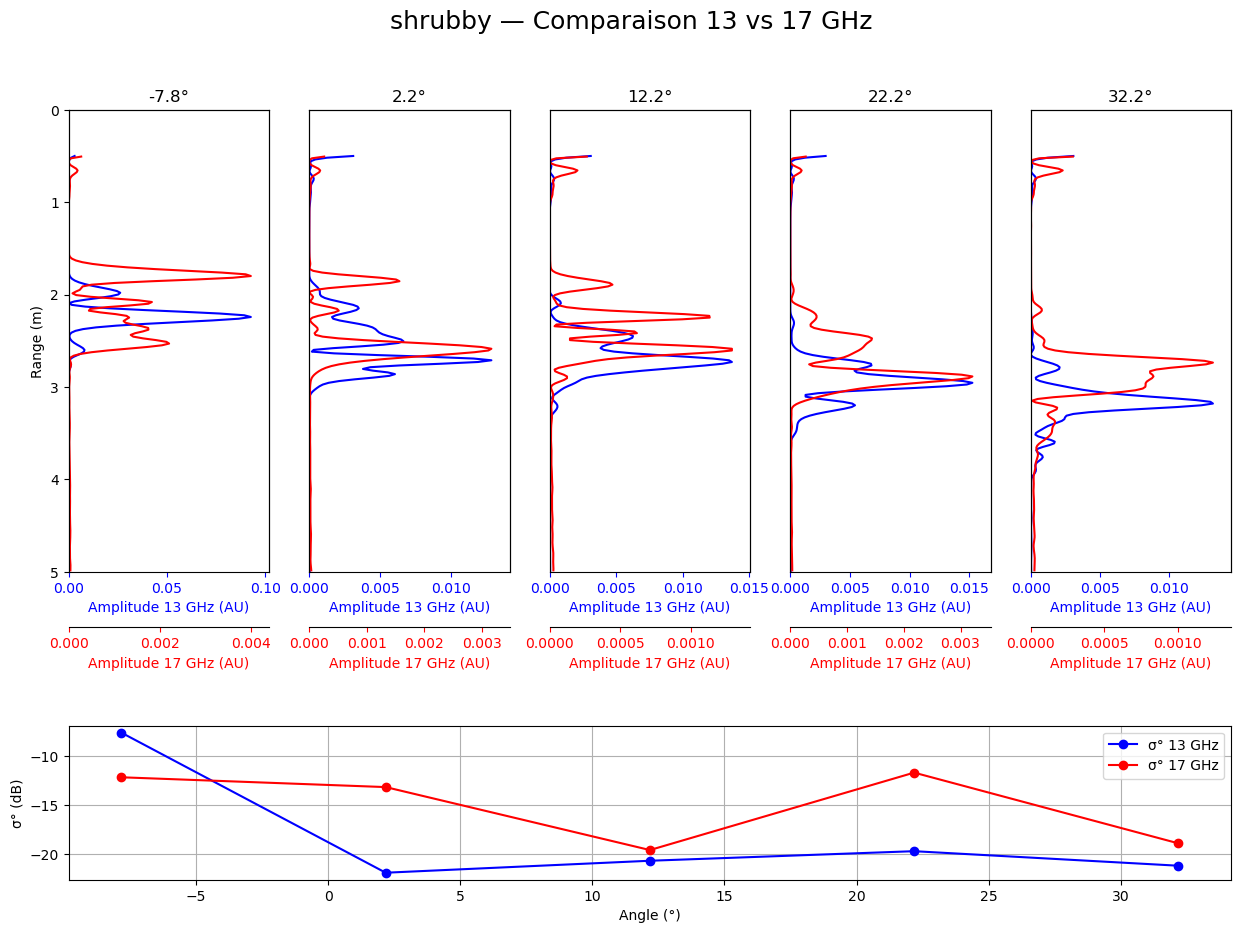

Figure enregistrée dans : ../results/multiangle_D10.png


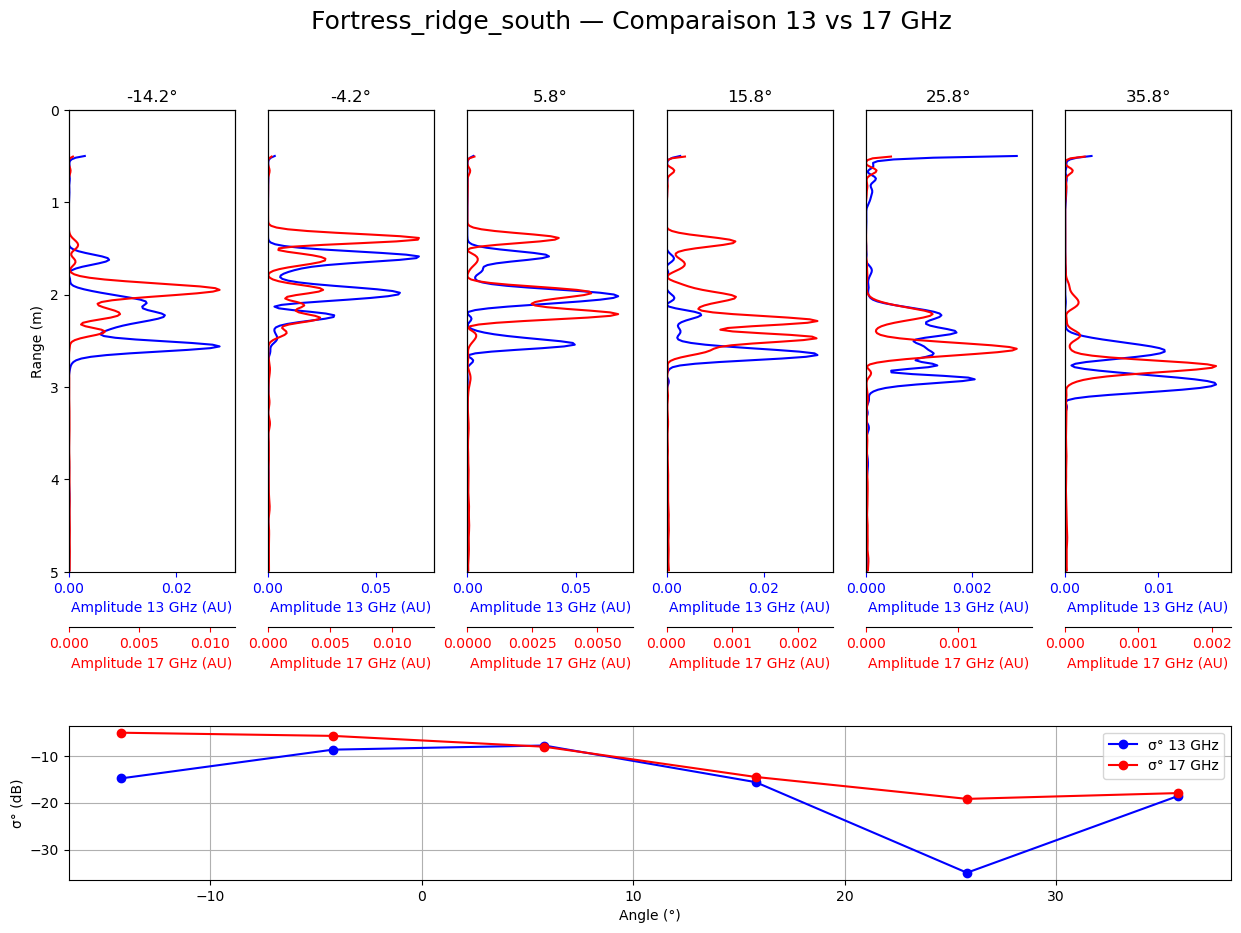

Figure enregistrée dans : ../results/multiangle_D1.png


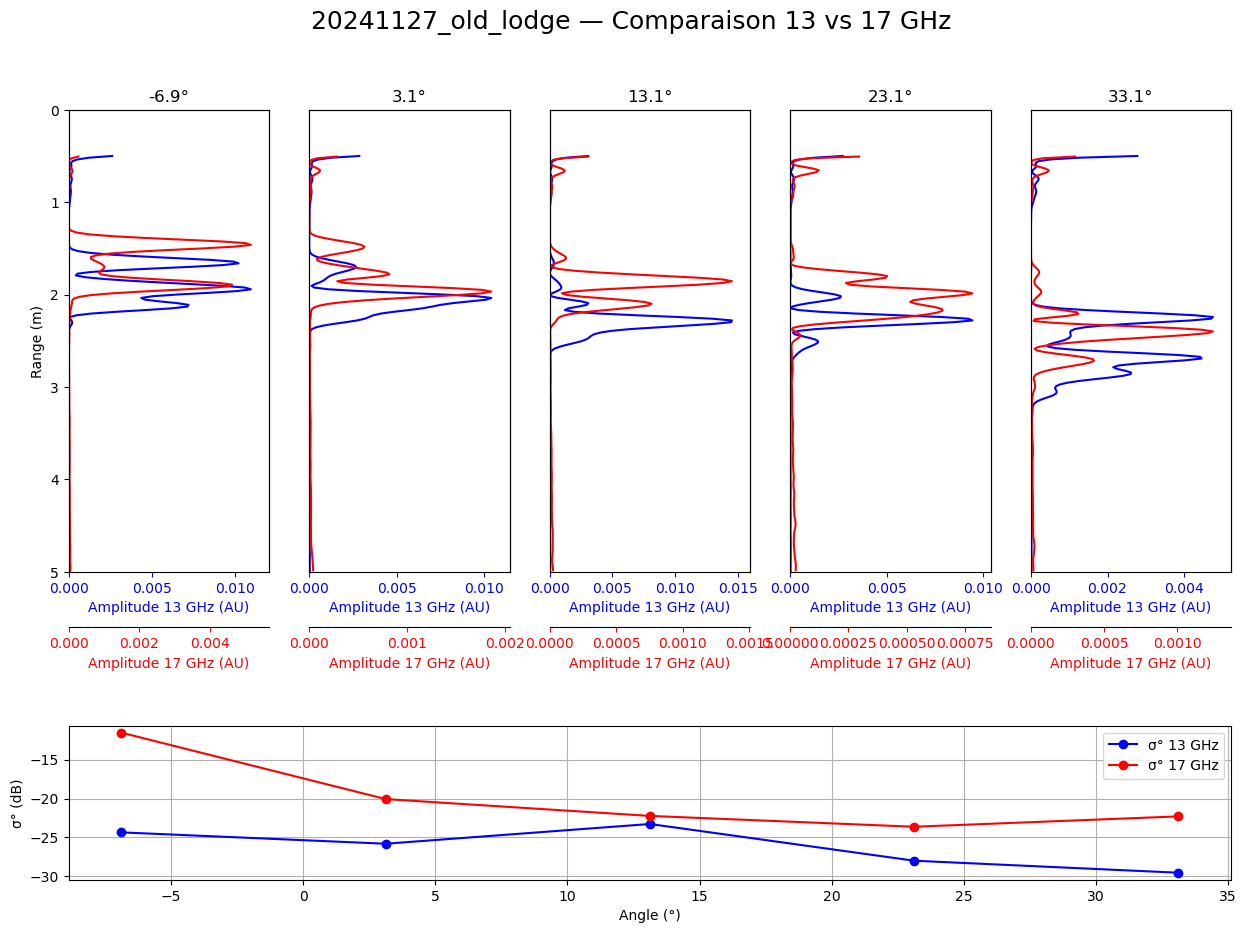

Figure enregistrée dans : ../results/multiangle_D2.png


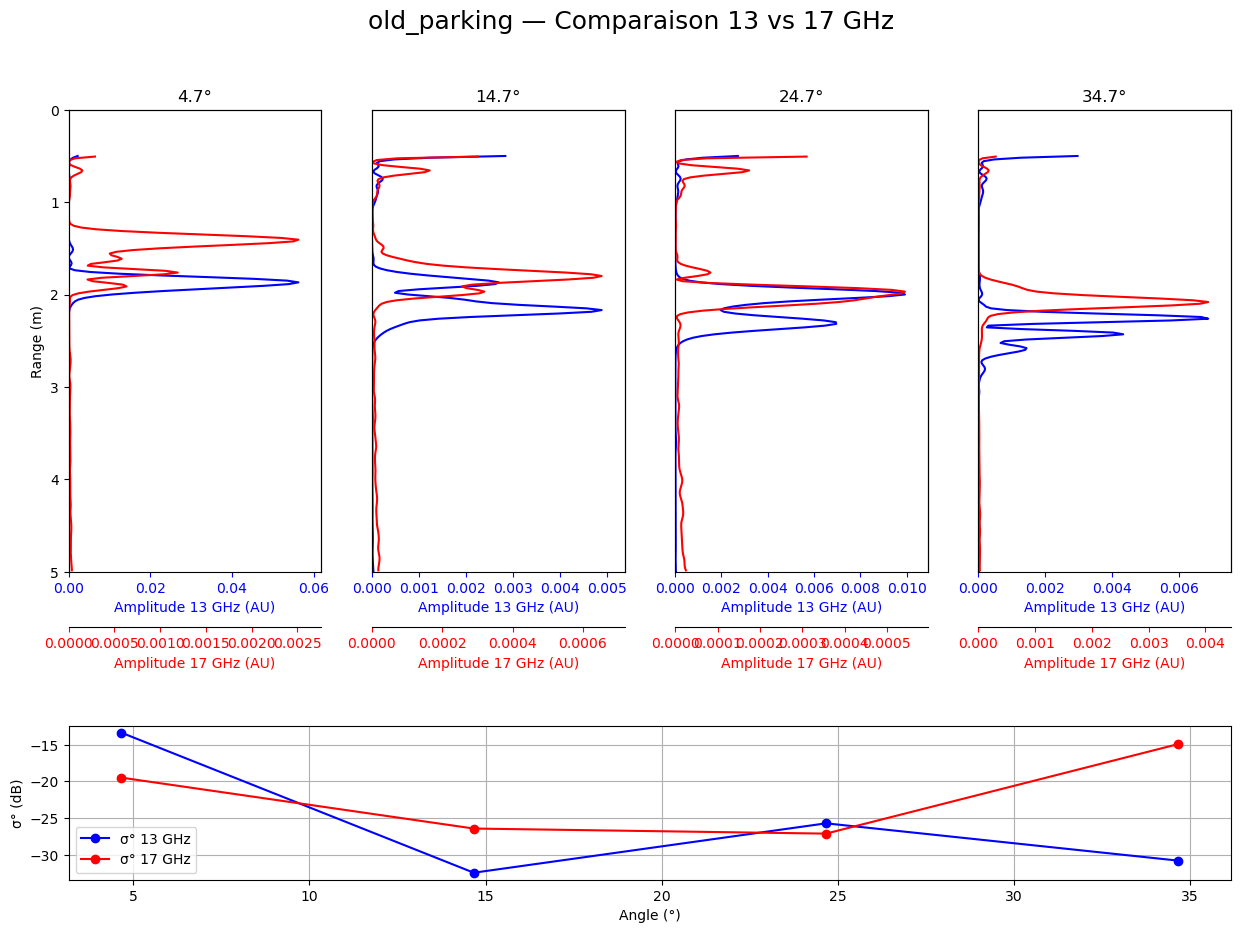

Figure enregistrée dans : ../results/multiangle_D11.png


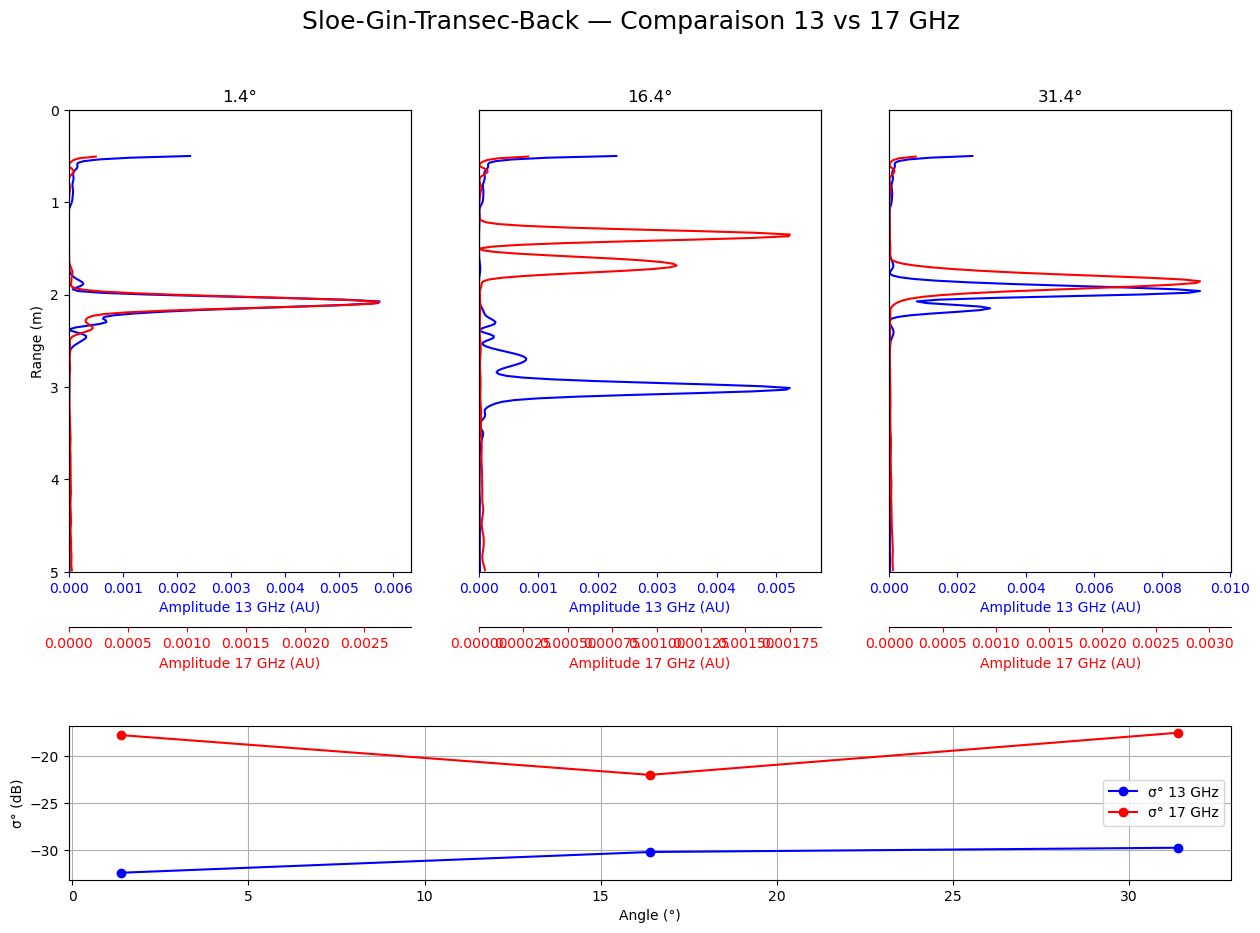

Figure enregistrée dans : ../results/multiangle_D6.png


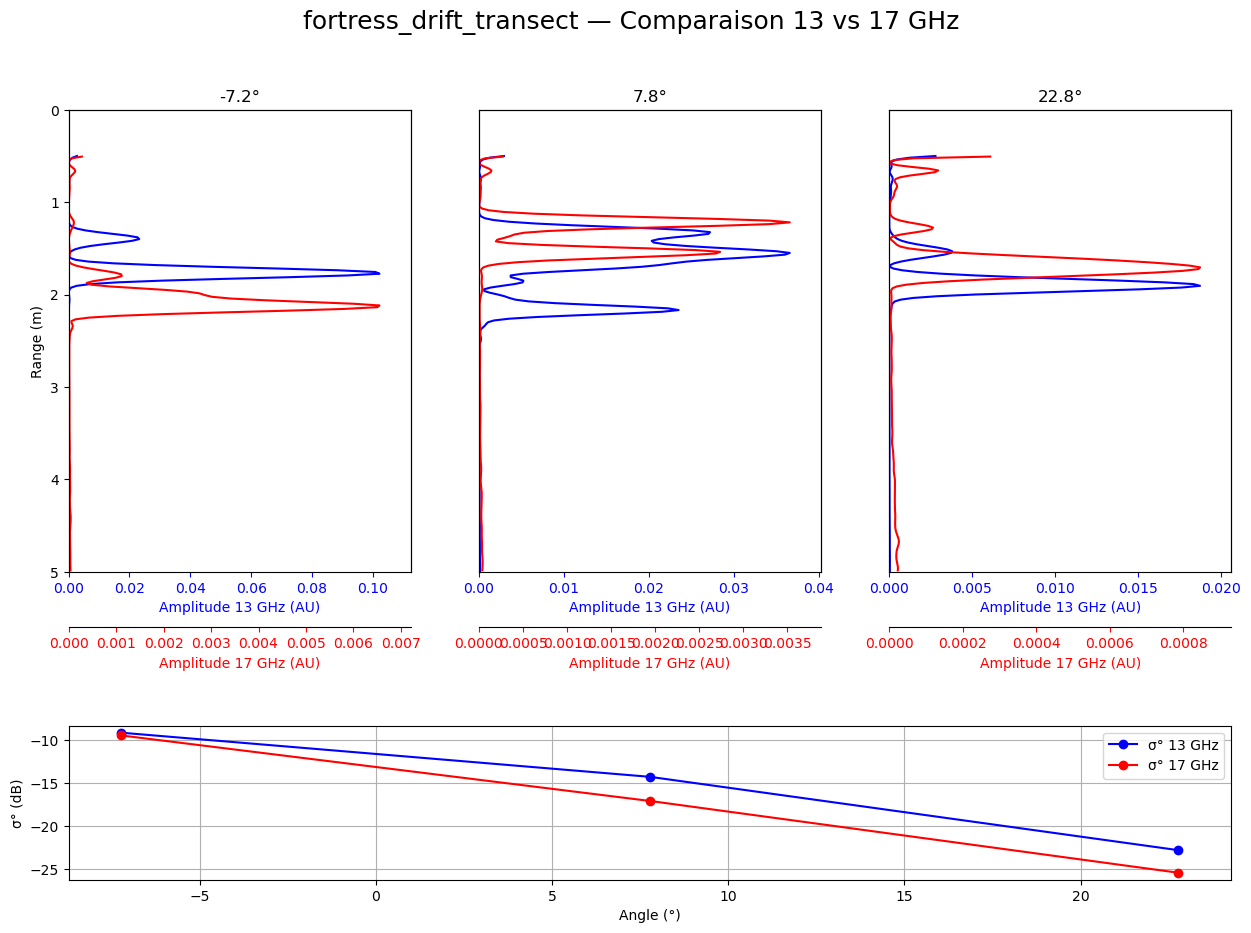

Figure enregistrée dans : ../results/multiangle_D4.png


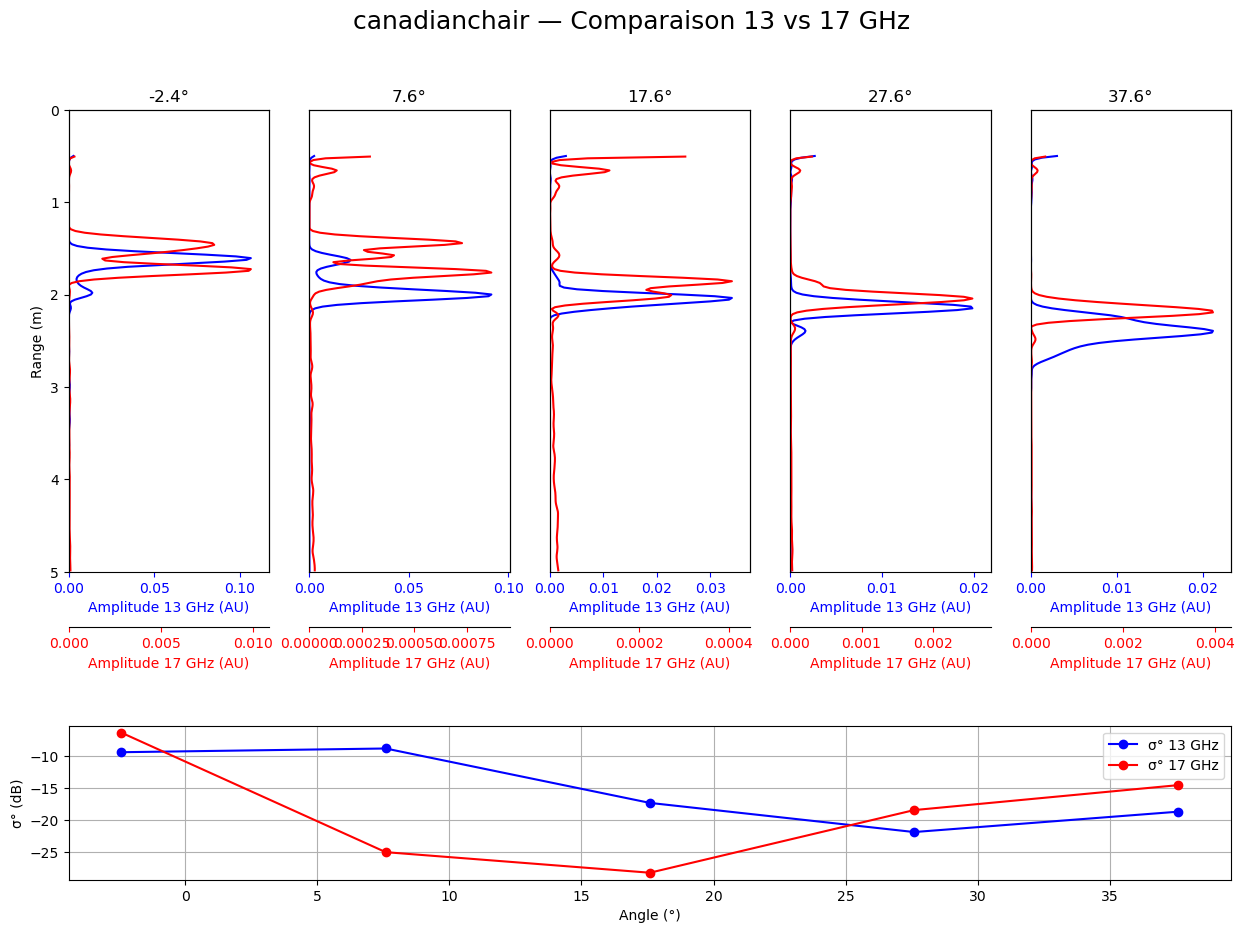

Figure enregistrée dans : ../results/multiangle_J2.png


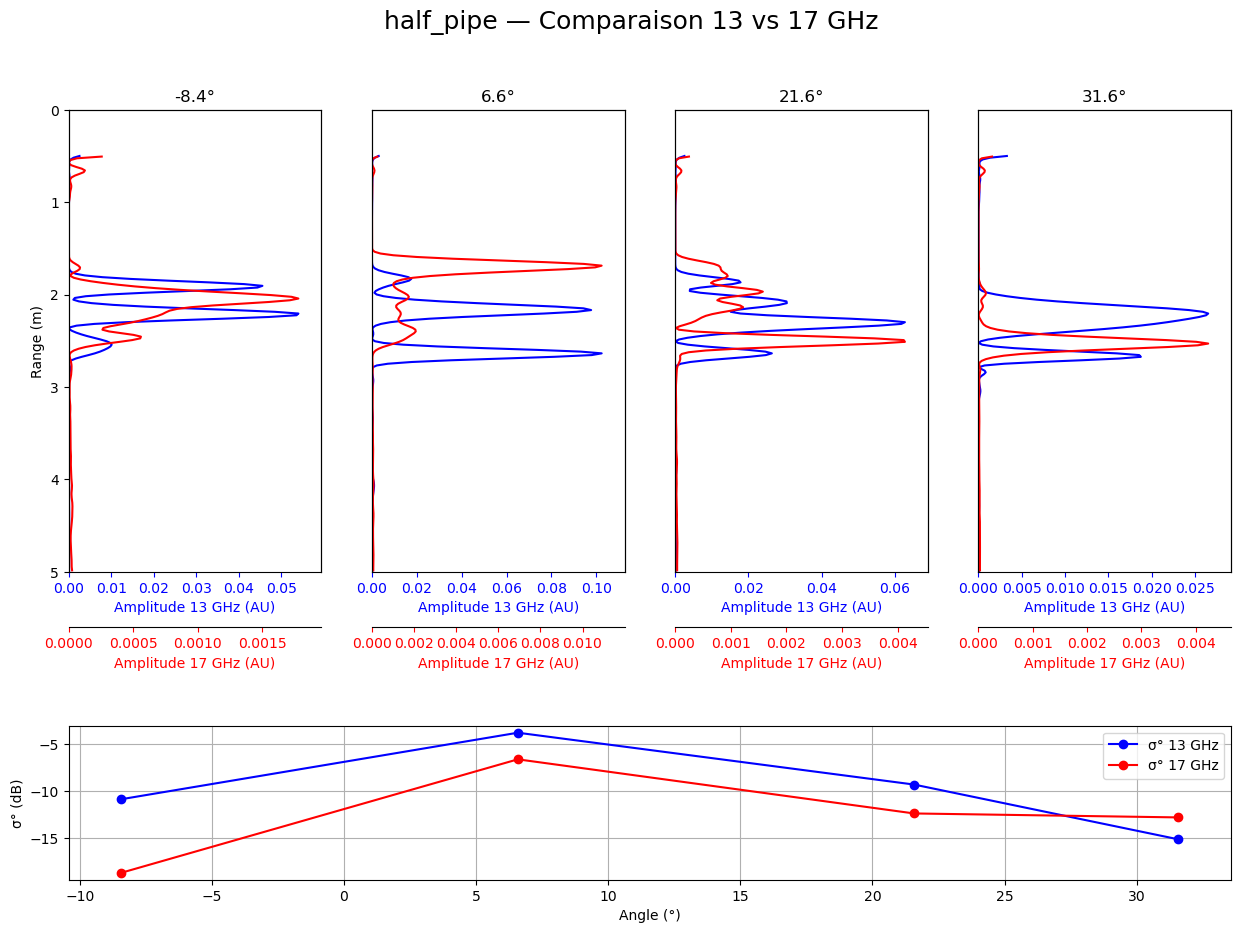

Figure enregistrée dans : ../results/multiangle_F6.png


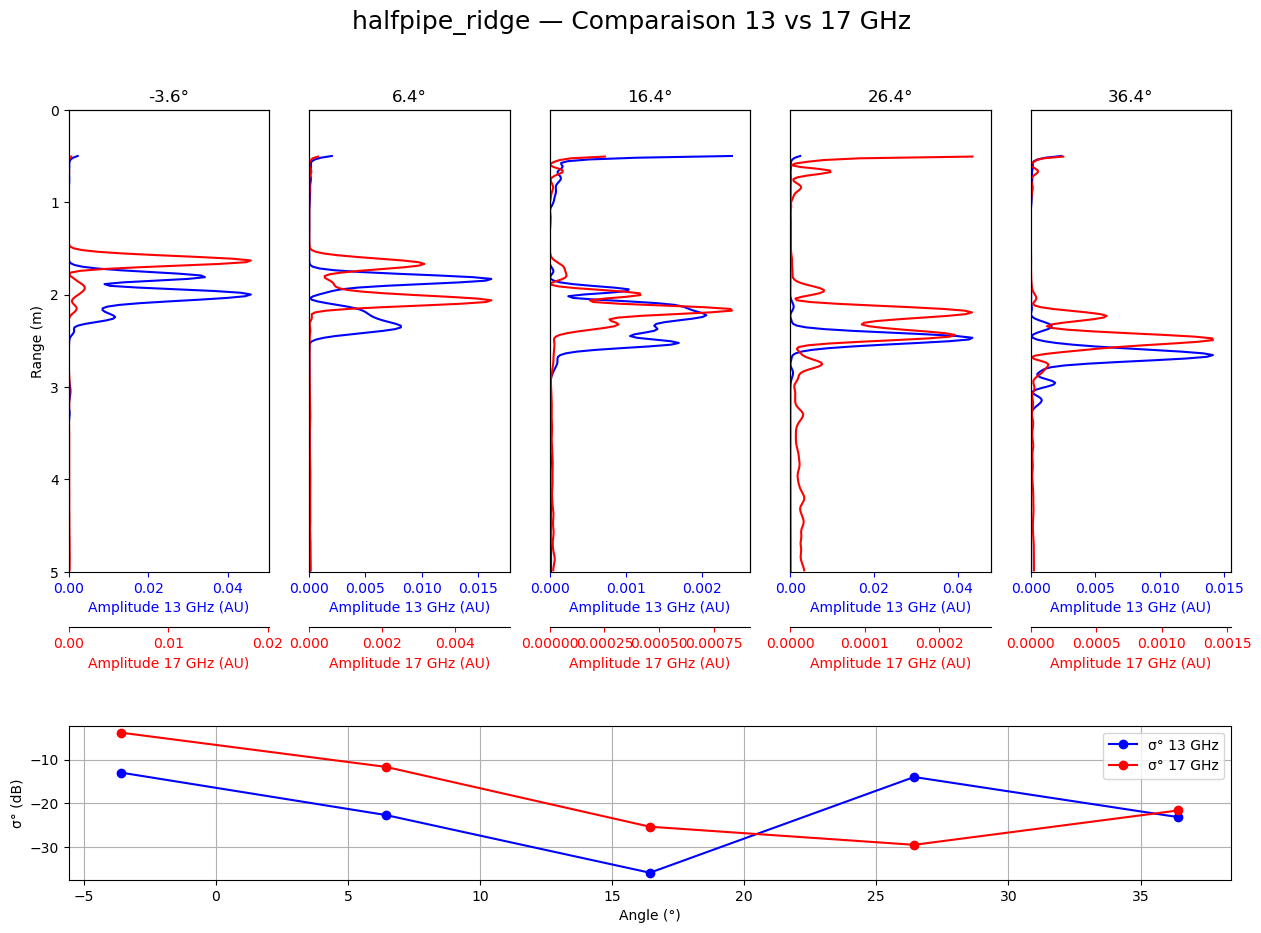

Figure enregistrée dans : ../results/multiangle_J1.png


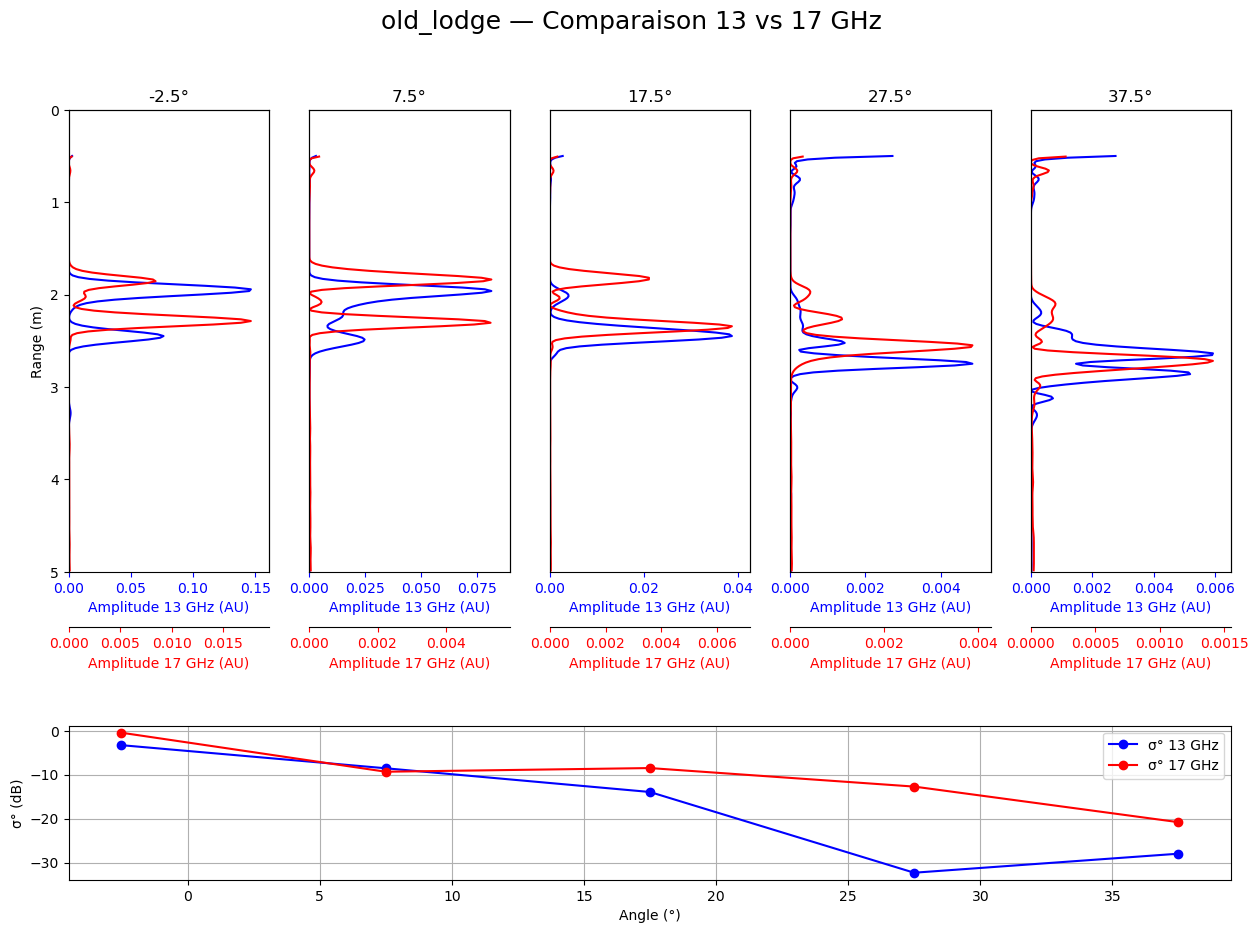

Figure enregistrée dans : ../results/multiangle_F4.png


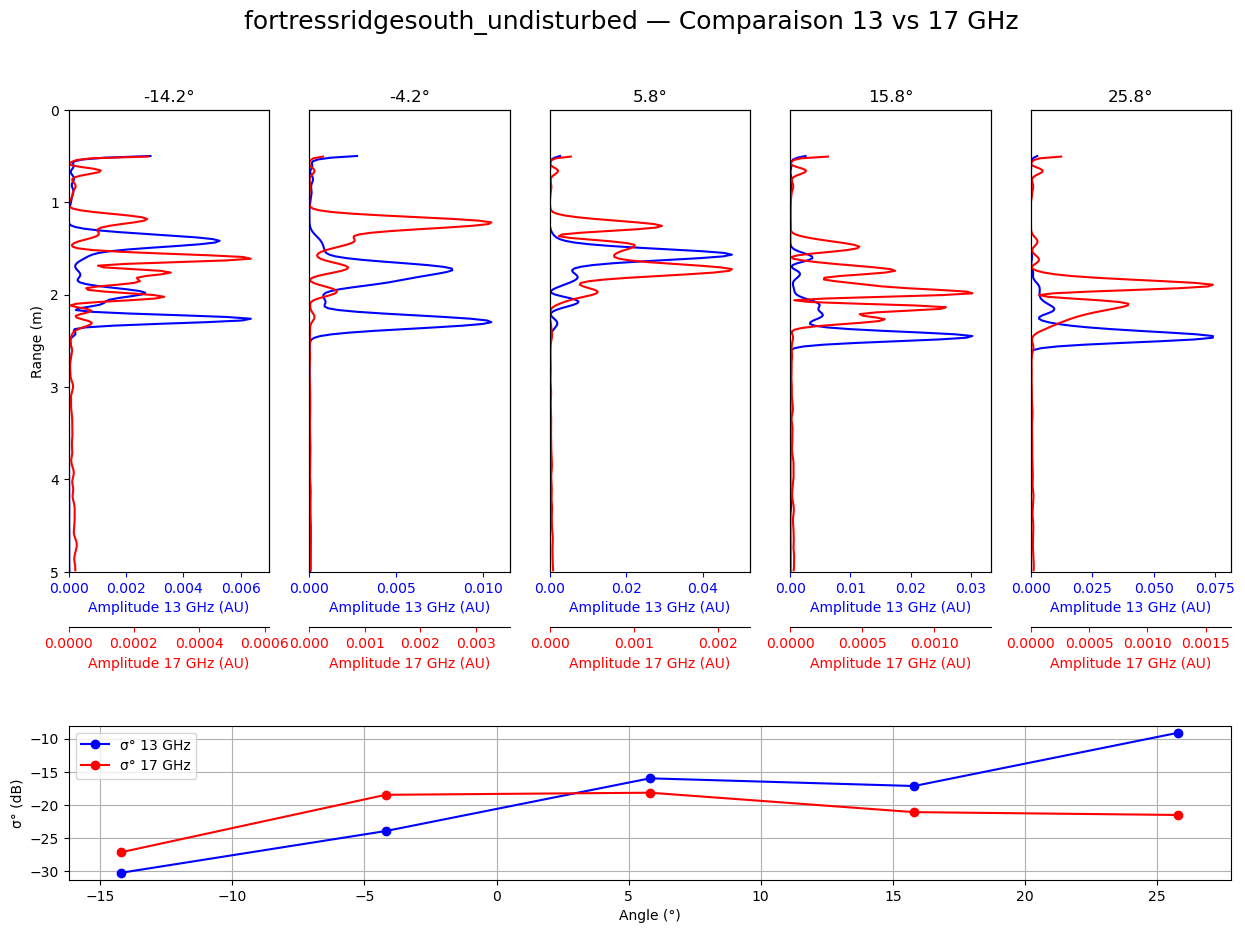

Figure enregistrée dans : ../results/multiangle_F5.png


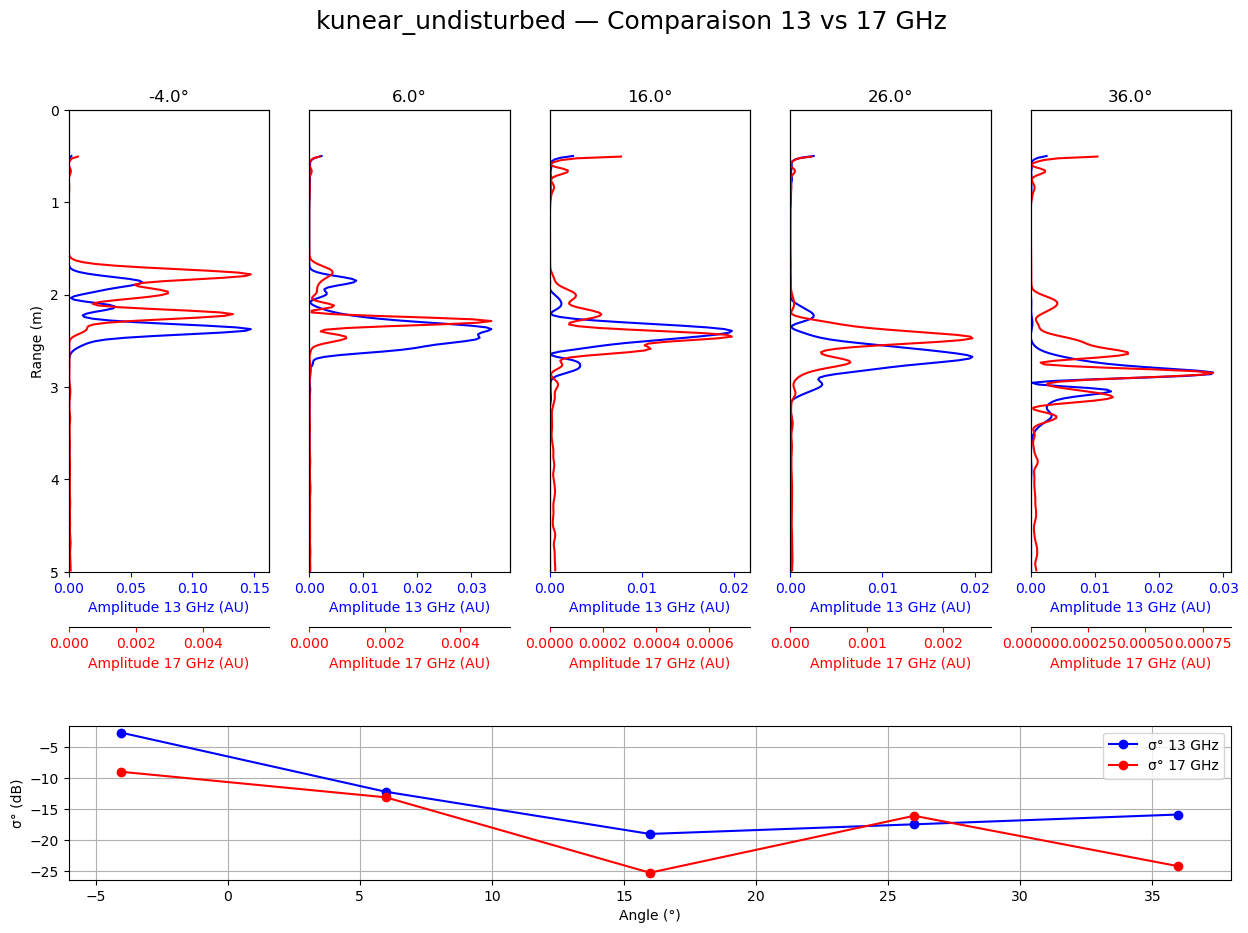

Figure enregistrée dans : ../results/multiangle_F7.png


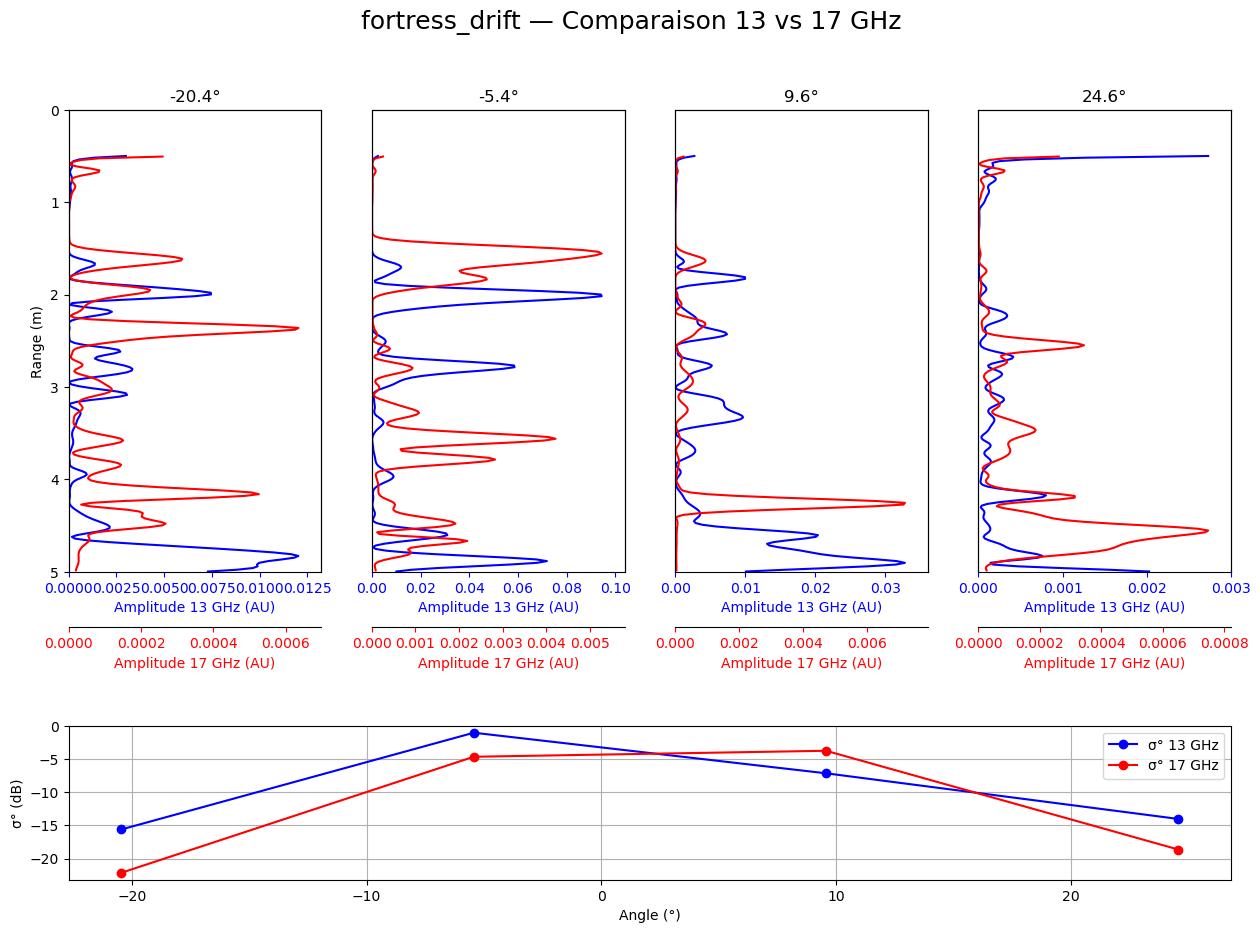

Figure enregistrée dans : ../results/multiangle_D7.png


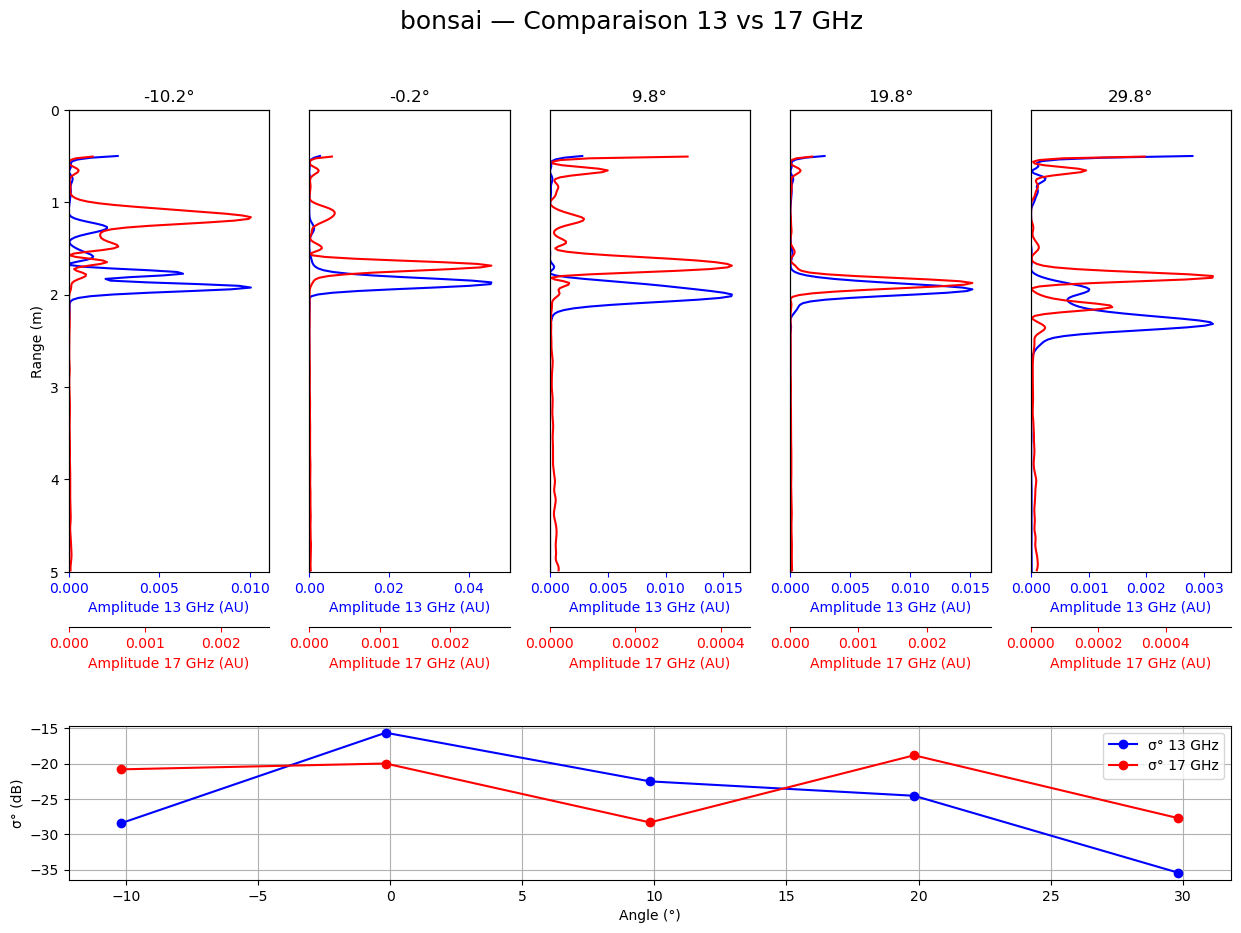

Figure enregistrée dans : ../results/multiangle_J8.png


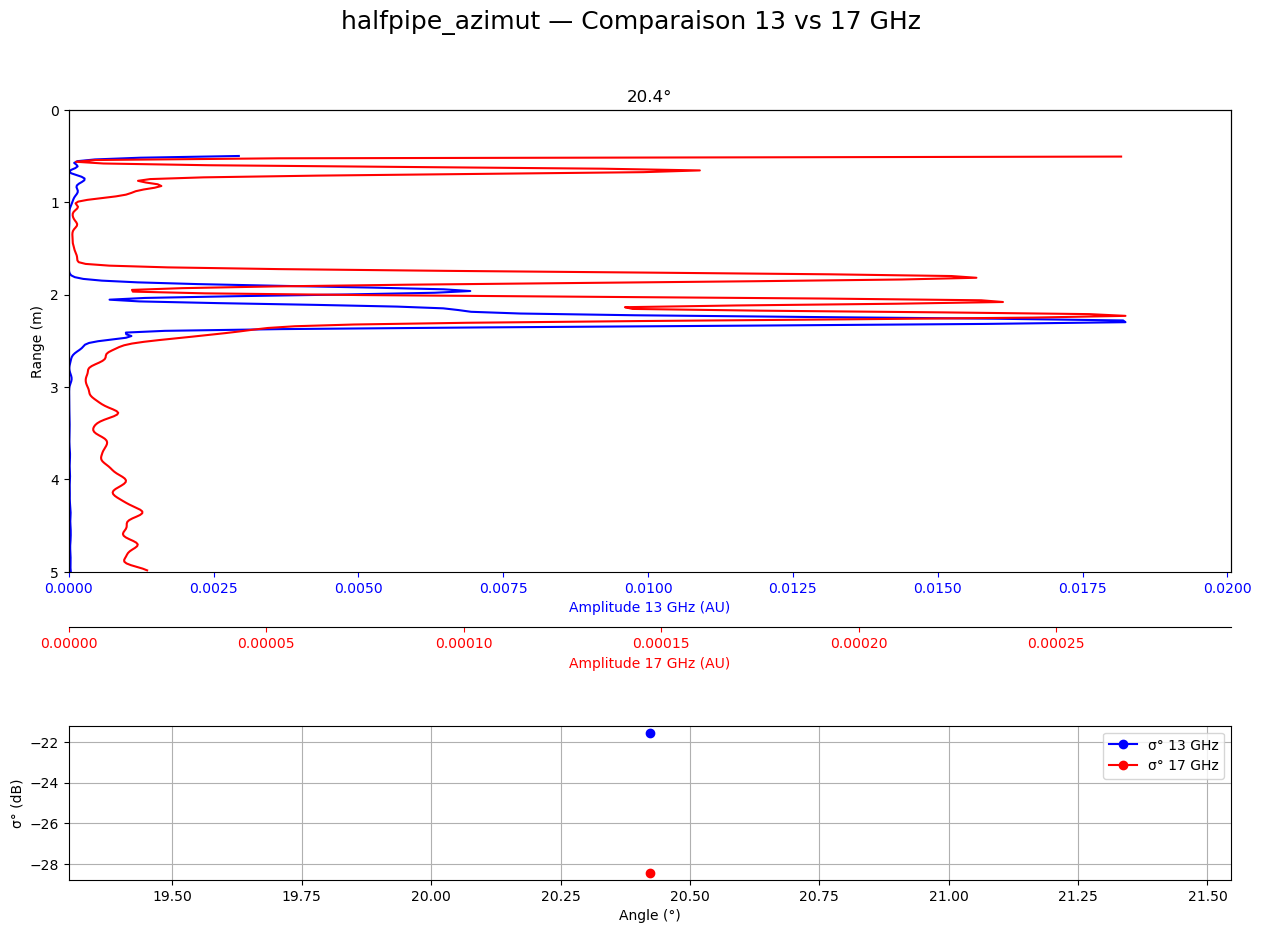

Figure enregistrée dans : ../results/multiangle_F3.png


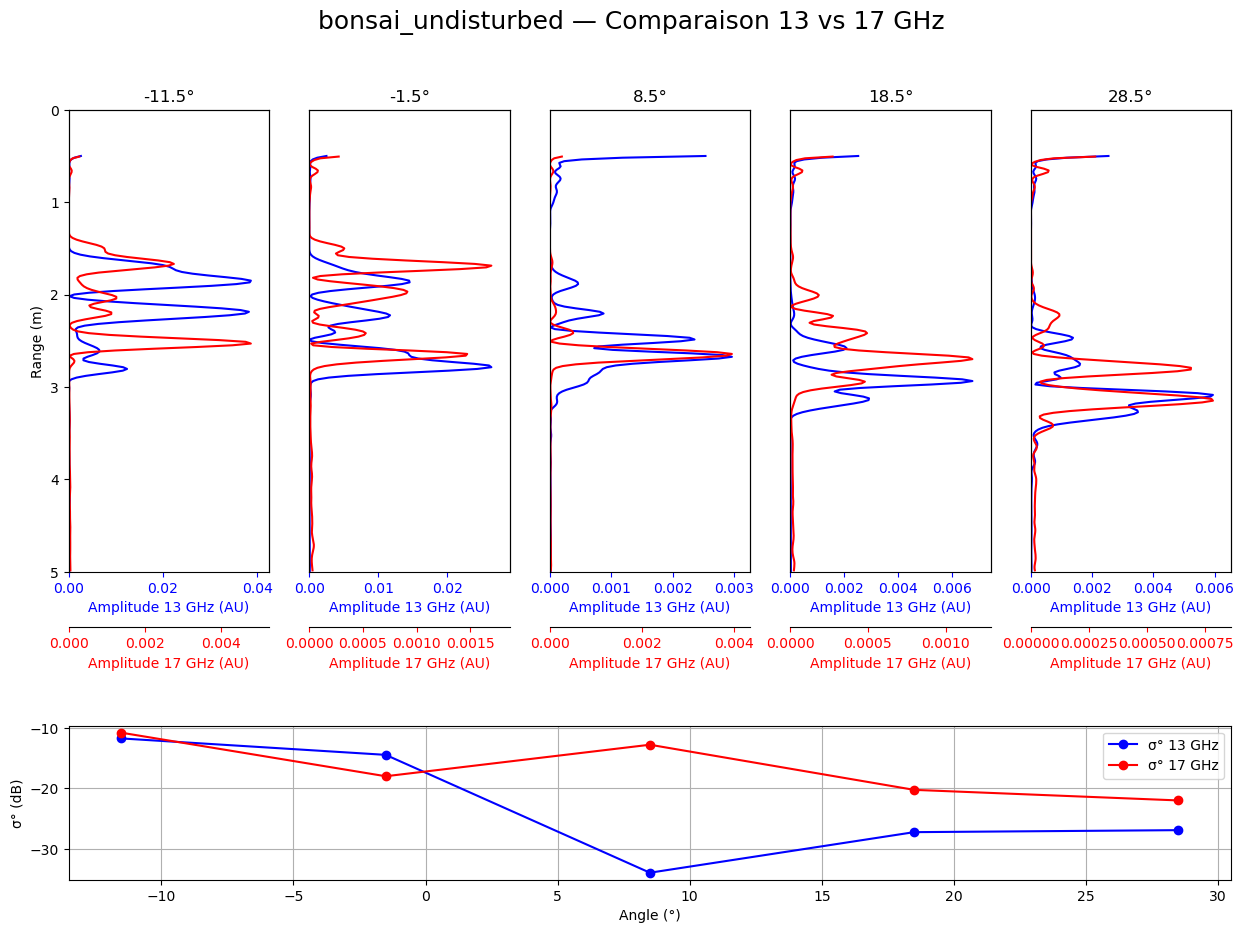

In [33]:
pits = glob.glob('../data/fm_on_snowpacks/*')


for pit in pits :
    file_list = glob.glob(os.path.join(pit,'*'))
    pit_id = os.path.split(pit)[1]
    # Dictionnaires séparés par fréquence
    classic_dict_13 = {}
    classic_dict_17 = {}

    # Remplissage des dictionnaires
    for file in file_list:
        # On ignore les fichiers d'excavation
        if "excav" in os.path.split(file)[1]:
            continue

        match = re.search(r'v_(\d+)deg', file)
        if not match:
            continue

        angle = int(match.group(1))

        rm = RadarMesure(file,compute=False)
        freq = rm.frequence   

        if freq == 13:
            classic_dict_13[angle] = file
        elif freq == 17:
            classic_dict_17[angle] = file

    common_angles = sorted(set(classic_dict_13.keys()) & set(classic_dict_17.keys()))
    data_13 = [RadarMesure(classic_dict_13[a]) for a in common_angles]
    data_17 = [RadarMesure(classic_dict_17[a]) for a in common_angles]

    plot_dual_frequency(data_13, data_17, pit_id,title_prefix="Comparaison 13 vs 17 GHz")


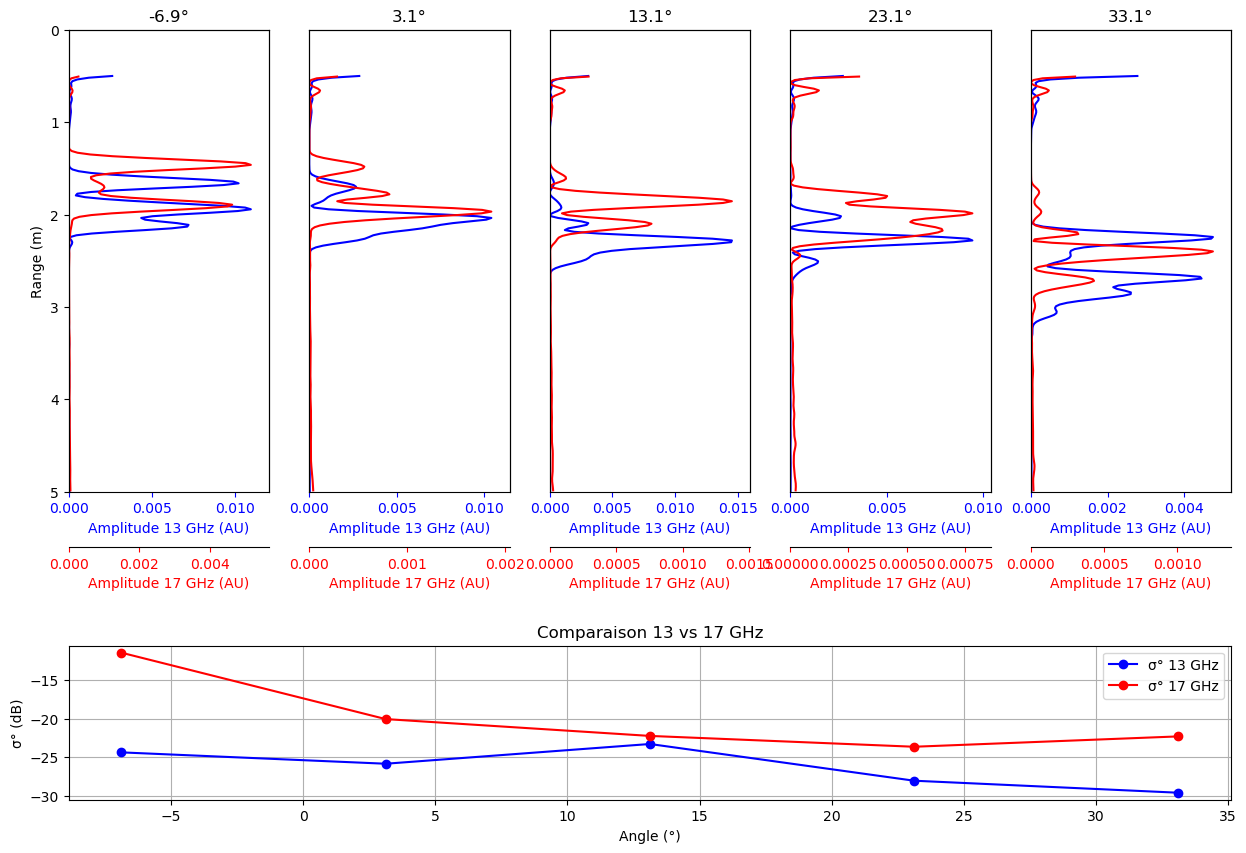

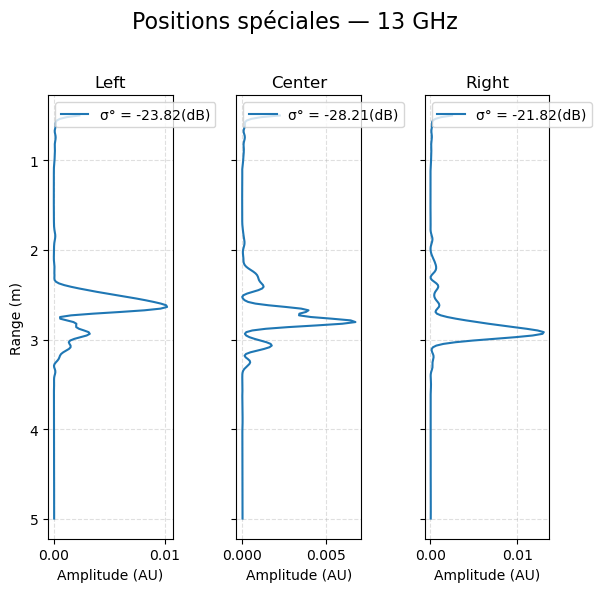

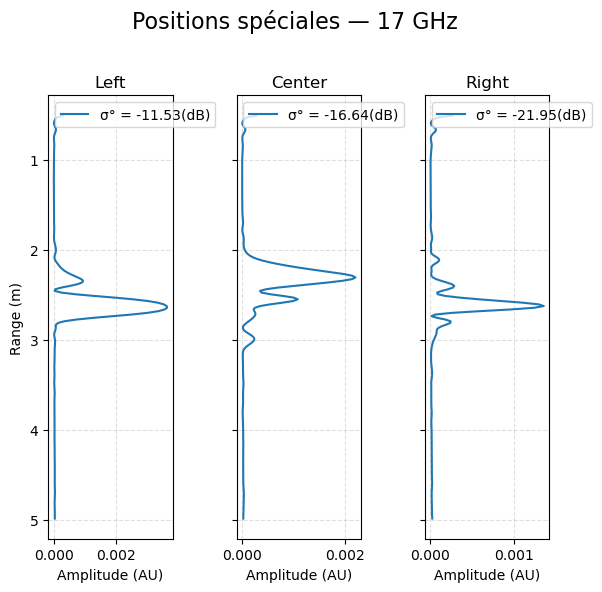

In [11]:
special_dict = {
    key: [f for f in file_list if key in f.lower()]
    for key in ["center", "left", "right"]
}

plot_special_horizontal(special_dict)